  ### Exploratory Data Analysis Project
  
 
  By: Nnebuo Augusta Chisom 
  
  Dataset: GooglePlaystore Dataset
  
  Project inspo:https://medium.com/@lamsampathkumar0/eda-exploratory-data-analysis-project-using-python-de90cbf4e128

#### Steps taken



importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading the Data  

playstore=pd.read_csv("Google-Playstore.csv")
playstore.head()



,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [253]:
#to see my full columns

#pd.set_option('display.max_rows', None)

#playstore
    
#playstore.head()



### Data Preparation and Cleaning

Once my data was loaded, i began wrangling the data to find out more about the data i have, and what extra feature i need in it
to get it ready for my analysis.

-The dataset has 2,312,944 rows and 24 columns. A very large dataset and cannot be handled by excel
Next,I cleaned it up.

In [3]:
playstore.shape

(2312944, 24)

In [4]:
playstore.describe().round()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2290061.0,2290061.0,2.312837e+06,2.312944e+06,2312944.0
mean,2.0,2865.0,1.834450e+05,3.202020e+05,0.0
std,2.0,212163.0,1.513144e+07,2.355496e+07,3.0
min,0.0,0.0,0.000000e+00,0.000000e+00,0.0
25%,0.0,0.0,5.000000e+01,8.400000e+01,0.0
50%,3.0,6.0,5.000000e+02,6.950000e+02,0.0
75%,4.0,42.0,5.000000e+03,7.354000e+03,0.0
max,5.0,138557570.0,1.000000e+10,1.205763e+10,400.0


In [7]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
App Name             object
App Id               object
Category             object
Rating               float64
Rating Count         float64
Installs             object
Minimum Installs     float64
Maximum Installs     int64
Free                 bool
Price                float64
Currency             object
Size                 object
Minimum Android      object
Developer Id         object
Developer Website    object
Developer Email      object
Released             object
Last Updated         object
Content Rating       object
Privacy Policy       object
Ad Supported         bool
In App Purchases     bool
Editors Choice       bool
Scraped Time         object
dtypes: bool(4), float64(4), int64(1), object(15)
memory usage: 361.8+ MB


#### Data types contained in my data
We have 24 columns in general, 5 of the columns contain numerical data (4floats and 1 integer), the other 19 are categorical and 4 of out of
them contain boolean data (True/False)

In [5]:
playstore.duplicated().sum()  #there are no duplicate columns in my dataset, beautiful!

0

In [6]:
playstore.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

### Handling missing values

In [7]:
playstore.isna().sum()   #13 out of my 24 columns have missing values, now lets look into this.

App Name                  2
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [8]:
playstore["App Name"].dropna().all    #The missing values in the first column were just 2 out of over 2 million, so i dropped them 
#as the wont affect the outcome of my analysis

<bound method Series.all of 0                                                    Gakondo
1                                        Ampere Battery Info
2                                                     Vibook
3          Smart City Trichy Public Service Vehicles 17UC...
4                                                    GROW.me
5                                                     IMOCCI
6                           unlimited 4G data prank free app
7                                      The Everyday Calendar
8                                                  WhatsOpen
9                           Neon 3d Iron Tech Keyboard Theme
10                                           Dodge The Cars!
11                                                   Parents
12                            桃園機場捷運時刻表 - 捷運轉乘路線快速查詢(支援台北捷運)
13                                              be.MOBILISED
14                                         Caliway Conductor
15                                     Readymade Grocery 

In [9]:
playstore.isna().sum()

App Name                  2
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [10]:
playstore.dropna(subset=["App Name"],inplace=True)
playstore.isna().sum().sort_values(ascending=False)

Developer Website    760834
Privacy Policy       420952
Released              71053
Rating                22883
Rating Count          22883
Minimum Android        6530
Size                    196
Currency                135
Installs                107
Minimum Installs        107
Developer Id             33
Developer Email          31
Maximum Installs          0
App Id                    0
Category                  0
Scraped Time              0
Free                      0
Price                     0
Editors Choice            0
Last Updated              0
Content Rating            0
Ad Supported              0
In App Purchases          0
App Name                  0
dtype: int64

Text(0.5, 1.0, 'Missing null values')

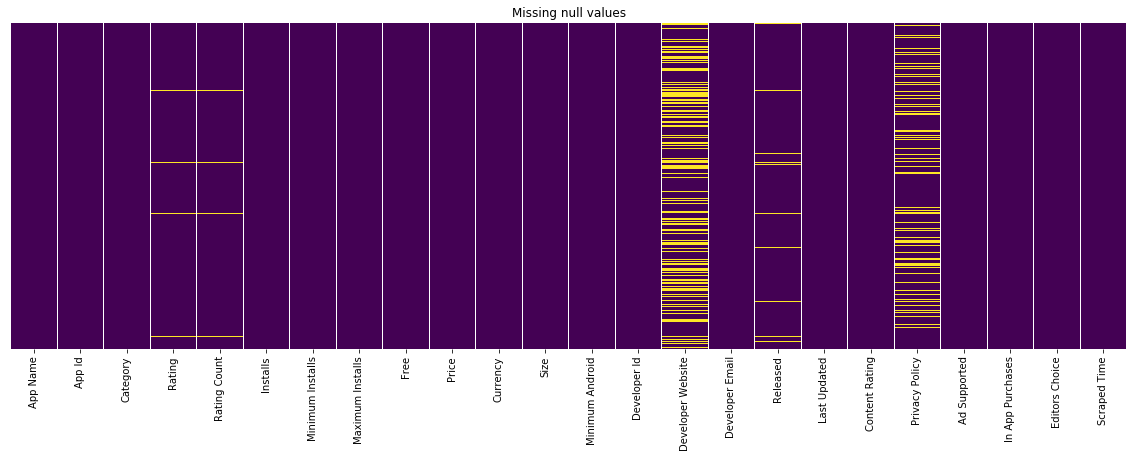

In [11]:
#Plotting the missing values for a cleare view


plt.rcParams['figure.figsize'] = (20,6)
sns.heatmap(playstore.isnull(),yticklabels = False, cbar = False , cmap = 'viridis')
plt.title("Missing null values")

## Observation

 As seen from the heatmap, Developer website and privacy policy had alot of missing values. Because these 2 columns are not soo important to my analysis,
i can drop then.

Released, rating, rating count and minimum android would be important to my analysis, so i would just handle them differently.

I can now drop the rows of other columns with less missing values because the are few and would not affect the quality of our 
analysis.



In [15]:
playstore.dropna(subset=["App Name",'Size','Currency','Installs','Minimum Installs','Developer Id','Developer Email'],inplace=True)
playstore.isna().sum().sort_values(ascending=False)

Developer Website    760716
Released              70748
Rating                22572
Rating Count          22572
Minimum Android        6530
Scraped Time              0
Price                     0
App Id                    0
Category                  0
Installs                  0
Minimum Installs          0
Maximum Installs          0
Free                      0
Size                      0
Currency                  0
Editors Choice            0
Developer Id              0
Developer Email           0
Last Updated              0
Content Rating            0
Ad Supported              0
In App Purchases          0
App Name                  0
dtype: int64

In [18]:
playstore.drop(columns="Privacy Policy",axis=1,inplace=True)
playstore.shape

KeyError: "['Privacy Policy'] not found in axis"

In [19]:
playstore.shape

#2 columns have been dropped

(2312548, 23)

In [20]:
playstore.isna().sum().sort_values(ascending=False)

Developer Website    760716
Released              70748
Rating                22572
Rating Count          22572
Minimum Android        6530
Scraped Time              0
Price                     0
App Id                    0
Category                  0
Installs                  0
Minimum Installs          0
Maximum Installs          0
Free                      0
Size                      0
Currency                  0
Editors Choice            0
Developer Id              0
Developer Email           0
Last Updated              0
Content Rating            0
Ad Supported              0
In App Purchases          0
App Name                  0
dtype: int64

In [22]:
print(playstore.head())
playmean=playstore["Rating"].mean()
playstore["Rating"].fillna(value=playmean,axis=0, inplace=False )

                                            App Name  \
0                                            Gakondo   
1                                Ampere Battery Info   
2                                             Vibook   
3  Smart City Trichy Public Service Vehicles 17UC...   
4                                            GROW.me   

                       App Id       Category  Rating  Rating Count Installs  \
0         com.ishakwe.gakondo      Adventure     0.0           0.0      10+   
1  com.webserveis.batteryinfo          Tools     4.4          64.0   5,000+   
2        com.doantiepvien.crm   Productivity     0.0           0.0      50+   
3     cst.stJoseph.ug17ucs548  Communication     5.0           5.0      10+   
4        com.horodyski.grower          Tools     0.0           0.0     100+   

   Minimum Installs  Maximum Installs  Free  Price  ...  \
0              10.0                15  True    0.0  ...   
1            5000.0              7662  True    0.0  ...   
2          

0          0.0
1          4.4
2          0.0
3          5.0
4          0.0
5          0.0
6          4.5
7          2.0
8          0.0
9          4.7
10         4.9
11         0.0
12         3.9
13         0.0
14         3.7
15         4.2
16         3.4
17         5.0
18         3.7
19         0.0
20         0.0
21         0.0
22         4.4
23         3.8
24         4.2
25         4.6
26         0.0
27         0.0
28         4.1
29         3.4
          ... 
2312914    0.0
2312915    0.0
2312916    0.0
2312917    0.0
2312918    2.7
2312919    4.8
2312920    0.0
2312921    0.0
2312922    0.0
2312923    0.0
2312924    0.0
2312925    0.0
2312926    0.0
2312927    0.0
2312928    0.0
2312929    4.4
2312930    3.3
2312931    2.8
2312932    4.3
2312933    4.0
2312934    0.0
2312935    0.0
2312936    0.0
2312937    0.0
2312938    3.4
2312939    4.3
2312940    0.0
2312941    0.0
2312942    3.5
2312943    5.0
Name: Rating, Length: 2312548, dtype: float64

In [23]:
playstore.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False,2021-06-15 20:19:35


In [24]:
### DATA CLEANING

playstore.nunique().sort_values(ascending=False)

App Id               2312548
App Name             2177593
Developer Email       950261
Developer Website     810271
Developer Id          758283
Maximum Installs      251541
Scraped Time           67374
Rating Count           38482
Released                4158
Last Updated            3917
Size                    1657
Price                   1063
Minimum Android          154
Category                  48
Rating                    42
Minimum Installs          22
Installs                  22
Currency                  15
Content Rating             6
Editors Choice             2
Free                       2
Ad Supported               2
In App Purchases           2
dtype: int64

In [25]:
playstore["App Name"].duplicated().sum()

#134,955 app names occured more than once, looking further into this

134955

### Exploring numerical columns

In [26]:
playstore["Installs"].head()

0       10+
1    5,000+
2       50+
3       10+
4      100+
Name: Installs, dtype: object

In [27]:
playstore['Installs'] = playstore['Installs'].str.split('+').str[0]    
playstore['Installs'].replace(',','', regex=True, inplace=True) 


In [30]:
playstore['Installs'] = playstore['Installs'].astype(int)  
playstore["Installs"].unique()

array([         10,        5000,          50,         100,        1000,
               500,       50000,       10000,           1,      500000,
            100000,           5,    10000000,     1000000,     5000000,
                 0,   100000000,    50000000,  1000000000,   500000000,
       -2147483648], dtype=int64)

with these, i have converted the installs column to just integers, with no additional characters like +.

Looking at other columns:

In [31]:
#converting the mimimum installs column from float to integer

playstore['Minimum Installs'] = playstore['Minimum Installs'].astype(int)  
playstore["Minimum Installs"].unique()

array([         10,        5000,          50,         100,        1000,
               500,       50000,       10000,           1,      500000,
            100000,           5,    10000000,     1000000,     5000000,
                 0,   100000000,    50000000,  1000000000,   500000000,
       -2147483648], dtype=int64)

In [32]:

playstore["Maximum Installs"].unique().dtype

dtype('int64')

In [ ]:
playstore.columns

In [ ]:
playstore["Free"].unique()

In [ ]:
playstore["Price"].unique()

In [ ]:
playstore["Size"].nunique()

In [ ]:
playstore["Size"].unique()

In [33]:
playstore["Size"]

0           10M
1          2.9M
2          3.7M
3          1.8M
4          6.2M
5           46M
6          2.5M
7           16M
8          1.3M
9          3.5M
10          51M
11         2.7M
12         7.6M
13          15M
14          29M
15          12M
16         2.9M
17         2.0M
18          70M
19          11M
20          24M
21         1.4M
22          16M
23          20M
24         2.4M
25          25M
26          16M
27          21M
28          11M
29         6.2M
           ... 
2312914     18M
2312915    4.8M
2312916    5.5M
2312917    9.1M
2312918     22M
2312919     10M
2312920     45M
2312921    6.5M
2312922    5.6M
2312923    8.0M
2312924    925k
2312925    9.4M
2312926    3.3M
2312927    994k
2312928     20M
2312929     65M
2312930     22M
2312931    2.8M
2312932     37M
2312933    4.1M
2312934    3.6M
2312935     29M
2312936     21M
2312937    6.6M
2312938     10M
2312939     77M
2312940     44M
2312941     29M
2312942     10M
2312943    5.2M
Name: Size, Length: 2312

Normally, data is stored in kb,gb or mb, its in the form k, m and g here, so i assume the rep kb, mb and gb respectively.
But for uniformity, i would be converting it to a common unit mb

1000kb=1mb
1000mb=1gb

therefore:
    1mb= kb*1000
    1mb=gb/1000

In [34]:
playstore['Size'] = playstore['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)

In [43]:
playstore['Size'] = playstore['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

because of the error message we received, we can see that there is a value that doesnt correspond to the float datatype, 
looking closer, we see the value 1,018. this must be an error as it varies with all other values. so to handle it specially,
we would remove the "," and convert it to a "."


In [42]:
playstore['Size'] = playstore['Size'].apply(lambda x: str(x).replace(',', '.') if ',' in str(x) else x)

In [44]:
playstore['Size'] = playstore['Size'].apply(lambda x: float(str(x).replace('G', '')) * 1000 if 'G' in str(x) else x)

In [45]:
playstore['Size'] = playstore['Size'].apply(lambda x: str(x).replace('Varies with device', '0') if 'Varies with device' in str(x) else x)

In [46]:
playstore['Size'] = playstore['Size'].apply(lambda x: float(x))

In [47]:
playstore["Size"].dtypes

dtype('float64')

In [ ]:
playstore["Size"].unique()

In [ ]:
playstore.columns

In [ ]:
playstore["Released"].unique()

In [ ]:
playstore["Last Updated"].unique()

In [ ]:
playstore["Content Rating"].unique()

In [ ]:
playstore["Ad Supported"].unique()

In [ ]:
playstore["In App Purchases"].unique()

In [ ]:
playstore["Category"].unique()

In [ ]:
playstore["Editors Choice"].unique()

In [48]:
playstore["Content Rating"].unique()

array(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [49]:
#To simplify the content ratings, we would reduce them to 3 general groups

playstore["Content Rating"]=playstore["Content Rating"].replace("Unrated","Everyone")
playstore["Content Rating"]=playstore["Content Rating"].replace("Everyone 10+","Teen")
playstore["Content Rating"]=playstore["Content Rating"].replace("Mature 17+","Adults")
playstore["Content Rating"]=playstore["Content Rating"].replace("Adults only 18+","Adults")
playstore['Content Rating'].unique()

array(['Everyone', 'Teen', 'Adults'], dtype=object)

Further analysis

In [50]:
playstore.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Ad Supported', 'In App Purchases', 'Editors Choice', 'Scraped Time'],
      dtype='object')

In [51]:
playstore.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10,15,True,0.0,...,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000,5000,7662,True,0.0,...,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50,50,58,True,0.0,...,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10,10,19,True,0.0,...,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100,478,True,0.0,...,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False,2021-06-15 20:19:35


To split the free column into free and paid, for easier analysis:

In [52]:
playstore['Type'] = np.where(playstore['Free'] == True,'Free','Paid')
playstore.drop(['Free'],axis=1, inplace= True )

In [53]:
playstore["Type"]

0          Free
1          Free
2          Free
3          Free
4          Free
5          Free
6          Free
7          Free
8          Free
9          Free
10         Free
11         Free
12         Free
13         Free
14         Free
15         Free
16         Free
17         Free
18         Free
19         Free
20         Free
21         Free
22         Free
23         Free
24         Free
25         Free
26         Free
27         Free
28         Free
29         Free
           ... 
2312914    Free
2312915    Free
2312916    Free
2312917    Free
2312918    Free
2312919    Free
2312920    Free
2312921    Free
2312922    Free
2312923    Free
2312924    Free
2312925    Free
2312926    Free
2312927    Paid
2312928    Free
2312929    Free
2312930    Free
2312931    Free
2312932    Free
2312933    Free
2312934    Free
2312935    Free
2312936    Free
2312937    Free
2312938    Free
2312939    Free
2312940    Free
2312941    Free
2312942    Free
2312943    Free
Name: Type, Length: 2312

In [54]:
playstore[playstore["Type"]=="Paid"].shape

(44929, 23)

In [55]:
playstore[playstore["Type"]=="Free"].shape

(2267619, 23)

We have 44,929 Paid apps, and 2,267,619 free apps

In [56]:
playstore.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Price', 'Currency', 'Size',
       'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Ad Supported', 'In App Purchases', 'Editors Choice', 'Scraped Time',
       'Type'],
      dtype='object')

In [57]:
playstore['Adverts'] = np.where(playstore['Ad Supported'] == True,'Supports ads','Doesnt support ads')
playstore.drop(['Ad Supported'],axis=1 )

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Currency,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,In App Purchases,Editors Choice,Scraped Time,Type,Adverts
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10,15,0.00,USD,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,2021-06-15 20:19:35,Free,Doesnt support ads
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000,5000,7662,0.00,USD,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,False,False,2021-06-15 20:19:35,Free,Supports ads
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50,50,58,0.00,USD,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,2021-06-15 20:19:35,Free,Doesnt support ads
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10,10,19,0.00,USD,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,False,False,2021-06-15 20:19:35,Free,Supports ads
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100,478,0.00,USD,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,2021-06-15 20:19:35,Free,Doesnt support ads
5,IMOCCI,com.imocci,Social,0.0,0.0,50,50,89,0.00,USD,...,http://www.imocci.com,info@imocci.com,"Dec 24, 2018","Dec 20, 2019",Teen,True,False,2021-06-15 20:19:35,Free,Doesnt support ads
6,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,Libraries & Demo,4.5,12.0,1000,1000,2567,0.00,USD,...,NaN,aitomgharfatimezzahra@gmail.com,"Sep 23, 2019","Sep 27, 2019",Everyone,False,False,2021-06-15 20:19:35,Free,Supports ads
7,The Everyday Calendar,com.mozaix.simoneboard,Lifestyle,2.0,39.0,500,500,702,0.00,USD,...,NaN,elementuser03@gmail.com,"Jun 21, 2019","Jun 21, 2019",Everyone,False,False,2021-06-15 20:19:35,Free,Doesnt support ads
8,WhatsOpen,com.whatsopen.app,Communication,0.0,0.0,10,10,18,0.00,USD,...,http://yilvermolinah.com,yilver.mh1996@gmail.com,NaN,"Dec 07, 2018",Teen,False,False,2021-06-15 20:19:35,Free,Doesnt support ads
9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,50000,50000,62433,0.00,USD,...,https://trendyteme888-31139.web.app,trendyteme.888@gmail.com,"Sep 22, 2019","Oct 07, 2020",Everyone,False,False,2021-06-15 20:19:35,Free,Supports ads


In [ ]:
playstore["Adverts"]

## Question and Aswers :

What are the top 10 Categories that are installed from the Google Play Store ?

Which are the Categories that are getting installed the most in top 10 Categories?

What is the higest rated Category ?

Which Category has the highest Paid and Free apps ?

What are the Top 5 Paid Apps based With highest ratings and installs ?

What are the Top 5 Free Apps based With highest ratings and installs ?

#### 1.What are the top 10 Categories that are installed from the Google Play Store ?

In [ ]:
#The top 10 categories is an ambigous questions, so we will look at the solution in 2 ways. The first is getting the
#top categories based on how many installs the category has, the next will be by counting how many times the category occurred.@

In [58]:
playstore.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Price', 'Currency', 'Size',
       'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Ad Supported', 'In App Purchases', 'Editors Choice', 'Scraped Time',
       'Type', 'Adverts'],
      dtype='object')

In [59]:
#playstore.groupby(by="Category").agg({"Installs":"sum"}).sort_values(by="Installs",ascending=False).head(10)

playstore["Category"].unique()

array(['Adventure', 'Tools', 'Productivity', 'Communication', 'Social',
       'Libraries & Demo', 'Lifestyle', 'Personalization', 'Racing',
       'Maps & Navigation', 'Travel & Local', 'Food & Drink',
       'Books & Reference', 'Medical', 'Puzzle', 'Entertainment',
       'Arcade', 'Auto & Vehicles', 'Photography', 'Health & Fitness',
       'Education', 'Shopping', 'Board', 'Music & Audio', 'Sports',
       'Beauty', 'Business', 'Educational', 'Finance', 'News & Magazines',
       'Casual', 'Art & Design', 'House & Home', 'Card', 'Events',
       'Trivia', 'Weather', 'Strategy', 'Word', 'Video Players & Editors',
       'Action', 'Simulation', 'Music', 'Dating', 'Role Playing',
       'Casino', 'Comics', 'Parenting'], dtype=object)

In [60]:
cat_count=playstore["Category"].value_counts().reset_index().rename(columns={"index":"Category","Category":"Count"})

In [61]:
cat_count.head()

,Category,Count
0,Education,241068
1,Music & Audio,154897
2,Tools,143971
3,Business,143749
4,Entertainment,138261


In [62]:
cat_installs=playstore.groupby(by="Category").agg({"Installs":"sum"}).sort_values(by="Installs")

cat_installs.head()

,Installs
Category,
Events,73016139.0
Parenting,244133966.0
Libraries & Demo,289118035.0
Comics,397602344.0
Beauty,404328787.0


In [53]:
#Category_installs = playstore.groupby(['Category'])[['Installs']].sum()

#Category_installs

In [64]:
top_cat_installs = pd.merge(cat_count, cat_installs, on='Category')
top_cat_installs.head(5)

,Category,Count,Installs
0,Education,241068,5.983816e+09
1,Music & Audio,154897,1.423940e+10
2,Tools,143971,3.785034e+10
3,Business,143749,5.236662e+09
4,Entertainment,138261,1.710840e+10


In [65]:
#this shows the top 10 categories based on their installs

top_10_cat_installs = top_cat_installs.head(10).sort_values(by = ['Installs'],ascending = False)

top_10_cat_installs.reset_index(drop=True)

,Category,Count,Installs
0,Tools,143971,3.785034e+10
1,Productivity,79681,2.116644e+10
2,Entertainment,138261,1.710840e+10
3,Music & Audio,154897,1.423940e+10
4,Personalization,89207,9.252971e+09
5,Lifestyle,118321,5.997921e+09
6,Education,241068,5.983816e+09
7,Business,143749,5.236662e+09
8,Books & Reference,116716,4.819175e+09
9,Health & Fitness,83497,4.586600e+09


In [66]:
#this shows the top 10 categories based on its count

top_10_cat_installs2 = top_cat_installs.head(10).sort_values(by = ['Count'],ascending = False)

top_10_cat_installs2.reset_index(drop=True)

,Category,Count,Installs
0,Education,241068,5.983816e+09
1,Music & Audio,154897,1.423940e+10
2,Tools,143971,3.785034e+10
3,Business,143749,5.236662e+09
4,Entertainment,138261,1.710840e+10
5,Lifestyle,118321,5.997921e+09
6,Books & Reference,116716,4.819175e+09
7,Personalization,89207,9.252971e+09
8,Health & Fitness,83497,4.586600e+09
9,Productivity,79681,2.116644e+10


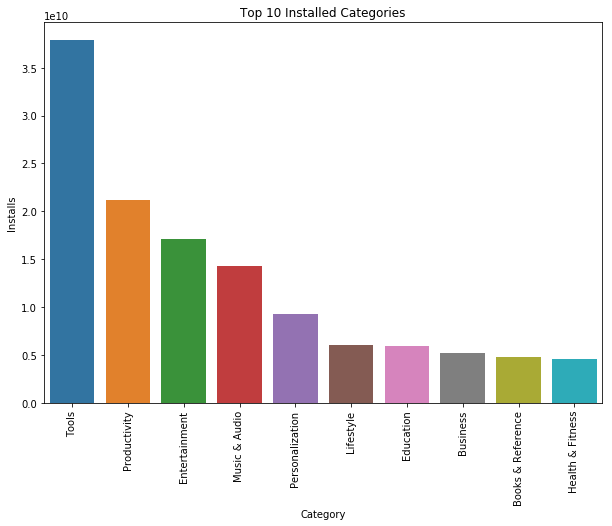

In [67]:
# Visualizing the solutions for the first question

plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of applications")
plt.title("Top 10 Installed Categories")
sns.barplot(x = top_10_cat_installs.Category,y= top_10_cat_installs.Installs)

### According to the installs, the top 10 categories are :

TOOLS, PRDUCTIVITY,ENTERTAINMENT,MUSIC&AUDIO,etc

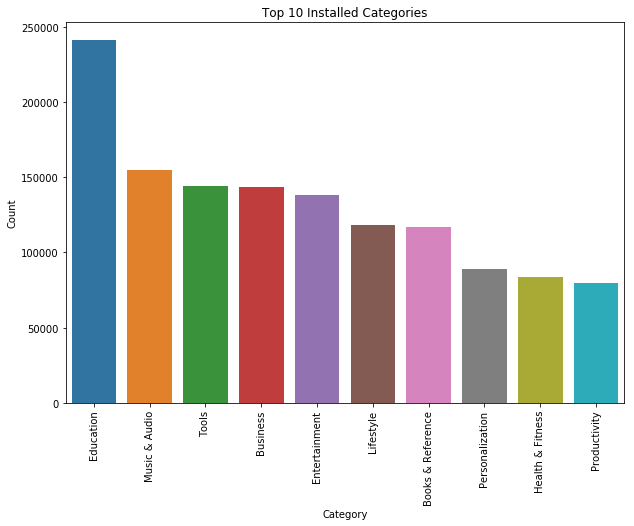

In [89]:

plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of applications")
plt.title("Top 10 Installed Categories")
sns.barplot(x = top_10_cat_installs2.Category,y= top_10_cat_installs2.Count)

#plt.bar(x=top_10_cat_installs2.Category, height= top_10_cat_installs2.Count)

### According to the installs, the top 10 categories are :

EDUCATION,MUSIC&AUDIO,TOOLS,BUSINESS,etc

in both, toools,music&audio and entertainment are tops

In [ ]:
#### 2.Which are the Categories that are getting installed the most in top 10 Categories?

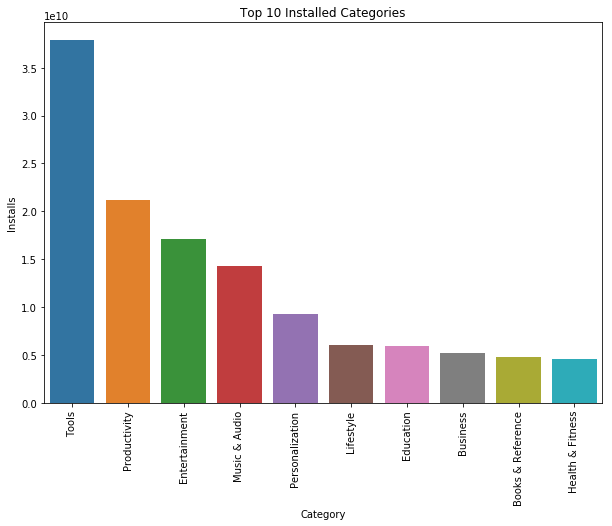

In [162]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of applications")
plt.title("Top 10 Installed Categories")
sns.barplot(x = top_10_cat_installs.Category,y= top_10_cat_installs.Installs)

The categories getting installed the most are:
TOOLS, PRODUCTIVITY, ENTERTAINMENT MUSIC&AUDIO, PERSONALIZATION and LIFESTYLE. With tools taking the lead.

In [68]:
#### 3.What is the higest rated Category ?

playstore.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Price', 'Currency', 'Size',
       'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Ad Supported', 'In App Purchases', 'Editors Choice', 'Scraped Time',
       'Type', 'Adverts'],
      dtype='object')

In [69]:

playstore["Rating"].head()

0    0.0
1    4.4
2    0.0
3    5.0
4    0.0
Name: Rating, dtype: float64

In [83]:
cat_rating=playstore.groupby(by="Category").agg({"Rating":"count"}).sort_values(by="Rating", ascending=False).head()

cat_rating

,Rating
Category,
Education,239779
Music & Audio,154587
Business,142140
Tools,141970
Entertainment,137573


### Education is the highest rated category. It was rated 239,779 times

In [111]:
#### 4.Which Category has the highest Paid apps ?

paid_apps=playstore[playstore["Type"]=="Paid"]

#paid_apps
paid_apps.reset_index().drop(columns="index")

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Currency,...,Developer Email,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Type,Adverts
0,Limitless Paint,com.bytescaffold.limitlesspaint,Tools,4.5,236.0,10000,10000,34125,1.990000,USD,...,traista.rafael@yahoo.com,"Nov 30, 2018","Apr 08, 2019",Everyone,False,False,False,2021-06-15 20:19:52,Paid,Doesnt support ads
1,Standalone Golf GPS by Hole19,com.hole19golf.wear,Sports,2.8,160.0,10000,10000,10407,4.990000,USD,...,help@hole19golf.com,"Feb 7, 2017","Dec 22, 2020",Everyone,False,False,False,2021-06-15 20:19:53,Paid,Doesnt support ads
2,Calculator + Widget 21 themes,makatea.pro.calculator.widget,Tools,3.5,468.0,10000,10000,12019,0.990000,USD,...,light.makatea@gmail.com,"Oct 4, 2012","Feb 09, 2014",Everyone,False,False,False,2021-06-15 20:20:00,Paid,Doesnt support ads
3,莎士比亞11連環錯（英漢對照）,tw.com.mebook.generic4719180217042,Education,0.0,0.0,1,1,2,2.990000,USD,...,welcome@mail.soyong.com.tw,"Mar 15, 2017","Mar 15, 2017",Everyone,False,False,False,2021-06-15 20:20:07,Paid,Doesnt support ads
4,Theme Park Simulator,com.bestridesimulators.theme.park.simulator.game,Simulation,3.8,1158.0,10000,10000,23644,0.990000,USD,...,cuentas.brs@gmail.com,"Nov 3, 2020","Feb 05, 2021",Everyone,True,True,False,2021-06-15 20:20:11,Paid,Supports ads
5,Bukuu - Akibat Menipu,bukuu.com.my.siri.haiwan.akibat.menipu,Education,0.0,0.0,1,1,2,1.990000,USD,...,bukuu.mmsc@gmail.com,"Jan 12, 2016","Jan 13, 2016",Everyone,False,False,False,2021-06-15 20:20:13,Paid,Doesnt support ads
6,JOTNA MEDIA GROUP,com.app.jotnamediagroupi,Business,4.9,19.0,100,100,487,4.990000,USD,...,kobe2die4@gmail.com,"Jun 15, 2020","Jun 15, 2020",Everyone,True,False,False,2021-06-15 20:20:14,Paid,Supports ads
7,"Web Development PRO (HTML, CSS)",com.technoapps.webdevelopmentpro,Education,4.5,79.0,5000,5000,7391,3.490000,USD,...,arcx.dev@gmail.com,"Dec 14, 2019","Dec 14, 2019",Everyone,False,False,False,2021-06-15 20:20:20,Paid,Doesnt support ads
8,K8 CODE PRIME,appinventor.ai_mc207742.K8_CODE_PRIME,Tools,0.0,0.0,10,10,38,24.990000,USD,...,mc207742@gmail.com,"Aug 8, 2019","Aug 09, 2019",Everyone,False,False,False,2021-06-15 20:20:20,Paid,Doesnt support ads
9,Kila: The Lazy Pig,kila.thelazypig,Books & Reference,0.0,0.0,1,1,2,0.990000,USD,...,support@kilafun.com,"Aug 10, 2020","Aug 10, 2020",Everyone,False,False,False,2021-06-15 20:20:21,Paid,Doesnt support ads


In [130]:
free_apps=playstore[playstore["Type"]=="Free"]

#free_apps
free_apps.reset_index().drop(columns="index")

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Currency,...,Developer Email,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Type,Adverts
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10,15,0.0,USD,...,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False,2021-06-15 20:19:35,Free,Doesnt support ads
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000,5000,7662,0.0,USD,...,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,True,False,False,2021-06-15 20:19:35,Free,Supports ads
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50,50,58,0.0,USD,...,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False,2021-06-15 20:19:35,Free,Doesnt support ads
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10,10,19,0.0,USD,...,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False,2021-06-15 20:19:35,Free,Supports ads
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100,478,0.0,USD,...,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False,2021-06-15 20:19:35,Free,Doesnt support ads
5,IMOCCI,com.imocci,Social,0.0,0.0,50,50,89,0.0,USD,...,info@imocci.com,"Dec 24, 2018","Dec 20, 2019",Teen,False,True,False,2021-06-15 20:19:35,Free,Doesnt support ads
6,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,Libraries & Demo,4.5,12.0,1000,1000,2567,0.0,USD,...,aitomgharfatimezzahra@gmail.com,"Sep 23, 2019","Sep 27, 2019",Everyone,True,False,False,2021-06-15 20:19:35,Free,Supports ads
7,The Everyday Calendar,com.mozaix.simoneboard,Lifestyle,2.0,39.0,500,500,702,0.0,USD,...,elementuser03@gmail.com,"Jun 21, 2019","Jun 21, 2019",Everyone,False,False,False,2021-06-15 20:19:35,Free,Doesnt support ads
8,WhatsOpen,com.whatsopen.app,Communication,0.0,0.0,10,10,18,0.0,USD,...,yilver.mh1996@gmail.com,NaN,"Dec 07, 2018",Teen,False,False,False,2021-06-15 20:19:35,Free,Doesnt support ads
9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,50000,50000,62433,0.0,USD,...,trendyteme.888@gmail.com,"Sep 22, 2019","Oct 07, 2020",Everyone,True,False,False,2021-06-15 20:19:35,Free,Supports ads


In [168]:
# Cat_type=pd.merge(paid_apps, free_apps, on='Category')
# Cat_type.head()

In [144]:
top_pay=paid_apps.groupby(by="Category").agg({"Type":"count"}).sort_values(by="Type",ascending=False)

top_pay.head()

,Type
Category,
Education,6547
Personalization,5767
Tools,4077
Books & Reference,3597
Productivity,1731


In [145]:
top_free=free_apps.groupby(by="Category").agg({"Type":"count"}).sort_values(by="Type",ascending=False)

top_free.head()

,Type
Category,
Education,234521
Music & Audio,153373
Business,143079
Tools,139894
Entertainment,136880


In [166]:
Cat_type=pd.merge(top_pay,top_free, on='Category').rename(columns={"Type_x":"Count of paid apps","Type_y":"Count of free apps"})
Cat_type.sort_values(by=["Count of paid apps","Count of free apps"],ascending=False).head()

,Count of paid apps,Count of free apps
Category,,
Education,6547,234521
Personalization,5767,83440
Tools,4077,139894
Books & Reference,3597,113119
Productivity,1731,77950


### Education Category has the highest count of paid and free apps

In [202]:
#### 5.What are the Top 5 Paid Apps based With highest ratings and installs ?

paid_apps=playstore[playstore["Type"]=="Paid"]

#paid_apps
paid_apps.reset_index().drop(columns="index")

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Currency,...,Developer Email,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Type,Adverts
0,Limitless Paint,com.bytescaffold.limitlesspaint,Tools,4.5,236.0,10000,10000,34125,1.990000,USD,...,traista.rafael@yahoo.com,"Nov 30, 2018","Apr 08, 2019",Everyone,False,False,False,2021-06-15 20:19:52,Paid,Doesnt support ads
1,Standalone Golf GPS by Hole19,com.hole19golf.wear,Sports,2.8,160.0,10000,10000,10407,4.990000,USD,...,help@hole19golf.com,"Feb 7, 2017","Dec 22, 2020",Everyone,False,False,False,2021-06-15 20:19:53,Paid,Doesnt support ads
2,Calculator + Widget 21 themes,makatea.pro.calculator.widget,Tools,3.5,468.0,10000,10000,12019,0.990000,USD,...,light.makatea@gmail.com,"Oct 4, 2012","Feb 09, 2014",Everyone,False,False,False,2021-06-15 20:20:00,Paid,Doesnt support ads
3,莎士比亞11連環錯（英漢對照）,tw.com.mebook.generic4719180217042,Education,0.0,0.0,1,1,2,2.990000,USD,...,welcome@mail.soyong.com.tw,"Mar 15, 2017","Mar 15, 2017",Everyone,False,False,False,2021-06-15 20:20:07,Paid,Doesnt support ads
4,Theme Park Simulator,com.bestridesimulators.theme.park.simulator.game,Simulation,3.8,1158.0,10000,10000,23644,0.990000,USD,...,cuentas.brs@gmail.com,"Nov 3, 2020","Feb 05, 2021",Everyone,True,True,False,2021-06-15 20:20:11,Paid,Supports ads
5,Bukuu - Akibat Menipu,bukuu.com.my.siri.haiwan.akibat.menipu,Education,0.0,0.0,1,1,2,1.990000,USD,...,bukuu.mmsc@gmail.com,"Jan 12, 2016","Jan 13, 2016",Everyone,False,False,False,2021-06-15 20:20:13,Paid,Doesnt support ads
6,JOTNA MEDIA GROUP,com.app.jotnamediagroupi,Business,4.9,19.0,100,100,487,4.990000,USD,...,kobe2die4@gmail.com,"Jun 15, 2020","Jun 15, 2020",Everyone,True,False,False,2021-06-15 20:20:14,Paid,Supports ads
7,"Web Development PRO (HTML, CSS)",com.technoapps.webdevelopmentpro,Education,4.5,79.0,5000,5000,7391,3.490000,USD,...,arcx.dev@gmail.com,"Dec 14, 2019","Dec 14, 2019",Everyone,False,False,False,2021-06-15 20:20:20,Paid,Doesnt support ads
8,K8 CODE PRIME,appinventor.ai_mc207742.K8_CODE_PRIME,Tools,0.0,0.0,10,10,38,24.990000,USD,...,mc207742@gmail.com,"Aug 8, 2019","Aug 09, 2019",Everyone,False,False,False,2021-06-15 20:20:20,Paid,Doesnt support ads
9,Kila: The Lazy Pig,kila.thelazypig,Books & Reference,0.0,0.0,1,1,2,0.990000,USD,...,support@kilafun.com,"Aug 10, 2020","Aug 10, 2020",Everyone,False,False,False,2021-06-15 20:20:21,Paid,Doesnt support ads


In [217]:
top_app_rate=paid_apps.groupby(by="App Name").agg({"Rating":"count"}).sort_values(by="Rating",ascending=False)

top_app_rate

,Rating
App Name,
Bass Booster Pro,4
Scientific Calculator Pro,4
Sudoku Pro,4
English Tenses,4
Root Checker Pro,3
App Manager,3
Always On Display – Super AMOLED HD Phone Screen,3
Lines Live Wallpaper,3
Nothing,3


In [188]:
top_app_installs=paid_apps.groupby(by="App Name").agg({"Installs":"count"}).sort_values(by="Installs",ascending=False)

top_app_installs.head()

,Installs
App Name,
Scientific Calculator Pro,4
Sudoku Pro,4
English Tenses,4
Bass Booster Pro,4
HT/FT Fixed Matches,3


In [201]:
app_type=pd.merge(top_app_rate,top_app_installs, on='App Name')
app_type.sort_values(by=["Rating","Installs"],ascending=False).head()
#app_type.head()

,Rating,Installs
App Name,,
Bass Booster Pro,4,4
Scientific Calculator Pro,4,4
Sudoku Pro,4,4
English Tenses,4,4
Root Checker Pro,3,3


#### Our top 5 Paid apps with highest rating and installs are:

#### Bass booster pro, Scientific Calculator pro, Sudoku pro, English tenses, Root Checker Pro

In [204]:
###6. What are the Top 5 Free Apps based With highest ratings and installs ?


free_apps=playstore[playstore["Type"]=="Free"]


free_apps.reset_index().drop(columns="index")

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Currency,...,Developer Email,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Type,Adverts
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10,15,0.0,USD,...,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False,2021-06-15 20:19:35,Free,Doesnt support ads
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000,5000,7662,0.0,USD,...,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,True,False,False,2021-06-15 20:19:35,Free,Supports ads
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50,50,58,0.0,USD,...,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False,2021-06-15 20:19:35,Free,Doesnt support ads
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10,10,19,0.0,USD,...,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False,2021-06-15 20:19:35,Free,Supports ads
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100,478,0.0,USD,...,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False,2021-06-15 20:19:35,Free,Doesnt support ads
5,IMOCCI,com.imocci,Social,0.0,0.0,50,50,89,0.0,USD,...,info@imocci.com,"Dec 24, 2018","Dec 20, 2019",Teen,False,True,False,2021-06-15 20:19:35,Free,Doesnt support ads
6,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,Libraries & Demo,4.5,12.0,1000,1000,2567,0.0,USD,...,aitomgharfatimezzahra@gmail.com,"Sep 23, 2019","Sep 27, 2019",Everyone,True,False,False,2021-06-15 20:19:35,Free,Supports ads
7,The Everyday Calendar,com.mozaix.simoneboard,Lifestyle,2.0,39.0,500,500,702,0.0,USD,...,elementuser03@gmail.com,"Jun 21, 2019","Jun 21, 2019",Everyone,False,False,False,2021-06-15 20:19:35,Free,Doesnt support ads
8,WhatsOpen,com.whatsopen.app,Communication,0.0,0.0,10,10,18,0.0,USD,...,yilver.mh1996@gmail.com,NaN,"Dec 07, 2018",Teen,False,False,False,2021-06-15 20:19:35,Free,Doesnt support ads
9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,50000,50000,62433,0.0,USD,...,trendyteme.888@gmail.com,"Sep 22, 2019","Oct 07, 2020",Everyone,True,False,False,2021-06-15 20:19:35,Free,Supports ads


In [221]:
top_app_rates=free_apps.groupby(by="App Name").agg({"Rating":"count"}).sort_values(by="Rating",ascending=False).head()

top_app_rates.head()

,Rating
App Name,
Tic Tac Toe,381
Calculator,260
Flashlight,254
BMI Calculator,199
Age Calculator,189


In [206]:
top_app_installss=free_apps.groupby(by="App Name").agg({"Installs":"count"}).sort_values(by="Installs",ascending=False)

top_app_installss.head()





,Installs
App Name,
Tic Tac Toe,382
Calculator,260
Flashlight,255
BMI Calculator,200
Age Calculator,189


In [207]:
app_type=pd.merge(top_app_rates,top_app_installss, on='App Name')
app_type.sort_values(by=["Rating","Installs"],ascending=False).head()
#app_type.head()

,Rating,Installs
App Name,,
Tic Tac Toe,381,382
Calculator,260,260
Flashlight,254,255
BMI Calculator,199,200
Age Calculator,189,189


#### Our top 5 Paid apps with highest rating and installs are:

#### Tic tac toe, Calculator, Flashlight, BMI Calculator, Age Calculator

# visualizing the top 5 categories based on maximum installs

In [ ]:
plt.figure(figsize=(8,6))
data = playstore.groupby('Category')['Maximum Installs'].max().sort_values(ascending = True)
data = data.head(5)
labels = data.keys()
plt.pie(data, labels= labels,autopct='%.0f%%') 
plt.title("Top 10 Max installations Category wise", fontsize=14)

In [249]:
# plt.figure(figsize=(8,6))
# Adult = playstore[(playstore['Content Rating']=='Adults')]
# Adult = Adult.groupby(['Category'])['Maximum Installs'].max().sort_values(ascending=False)
# Adult = Adult.head(10)
# labels = Adult.keys()
# plt.pie(x = Adult, autopct="%.1f%%", labels=labels)
# plt.title("Adults Installing apps in terms of category", fontsize=14)

# Summary and Conclusion

Apps in the education categories receive more ratings than the rest, when free or paid


.People are more intrested to install the gaming Apps, the top Rating is given to the gaming apps.

People are mostly dwonladed the free apps the installation of the free apps is high and the availabilty of the free apps also is very high.
